# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
warnings.filterwarnings("ignore")

# Load Dataset 

In [2]:
df = pd.read_csv("marketing_campaign.csv", sep="\t")

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

# Data Preprocessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [7]:
print(df.isnull().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [8]:
print(df.isna().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


To remove the null values, we will fill it with 'fillna'. Since income is a numeric column, we will use mean to fill the NaN row.

In [9]:
df.loc[:,'Income'] = df.loc[:,['Income']].fillna(df['Income'].mean())
print(df.isnull().sum())

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


# EDA

In this exploratory, i am interested in discovering more about the relation of digital engagement and response to promotions. In order to simplify the calculation, i will create a new variable based only from 'Year_Birth', 'Education', 'Marital_Status', 'Income' to determine the individual background information and 'NumWebPurchases', 'NumWebVisitsMonth' to calculate the digital engagement, and last i use 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response' to help facilitating clustering of response to promotions

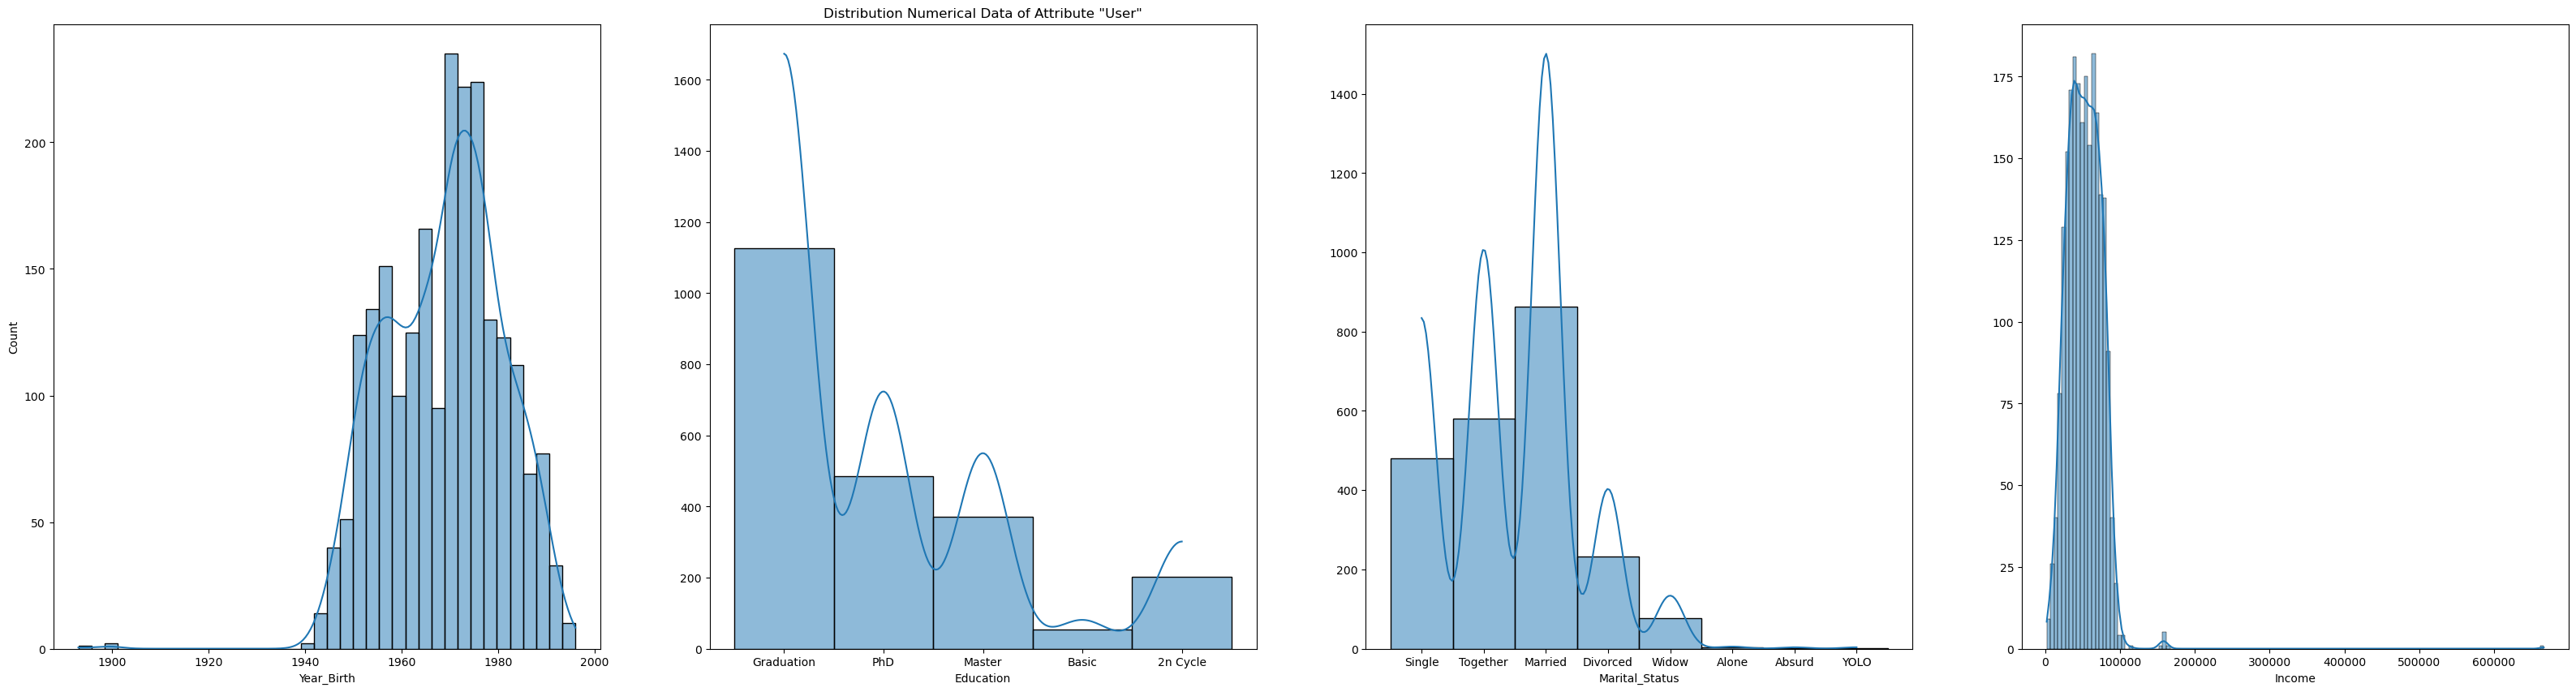

In [10]:
plt.figure(figsize = (40, 10))
n = 0
for cols in ['Year_Birth','Education', 'Marital_Status', 'Income']:
    n += 1
    plt.subplot(1 , 4 , n)
    sns.histplot(df[cols], kde=True)
    plt.ylabel('Count' if n == 1 else '')
    plt.title('Distribution Numerical Data of Attribute "User"' if n == 2 else '')
plt.show()

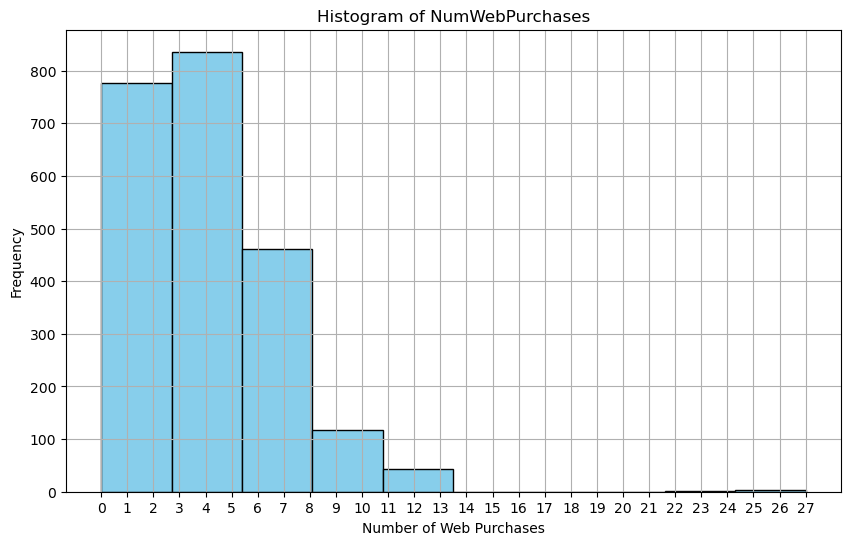

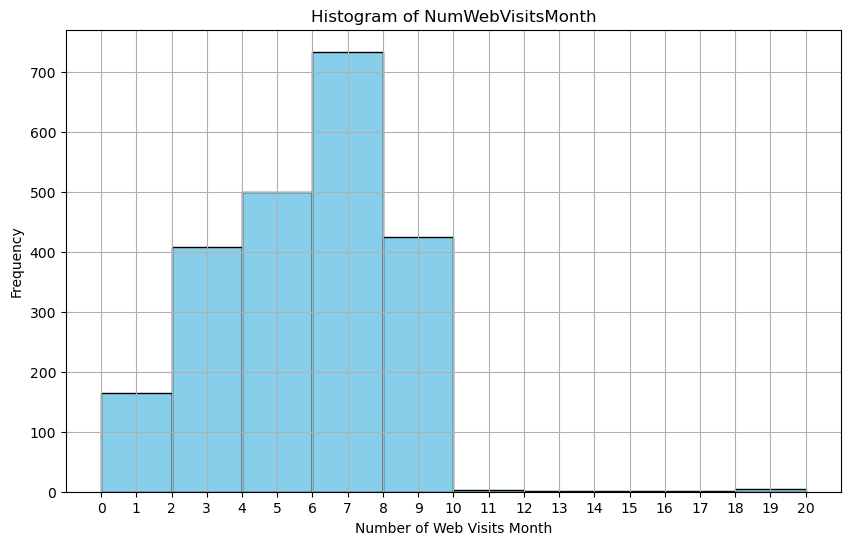

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(df['NumWebPurchases'], bins=10, color='skyblue', edgecolor='black')
plt.xticks(range(int(min(df['NumWebPurchases'])), int(max(df['NumWebPurchases']))+1))
plt.title('Histogram of NumWebPurchases')
plt.xlabel('Number of Web Purchases')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df['NumWebVisitsMonth'], bins=10, color='skyblue', edgecolor='black')
plt.xticks(range(int(min(df['NumWebVisitsMonth'])), int(max(df['NumWebVisitsMonth']))+1))
plt.title('Histogram of NumWebVisitsMonth')
plt.xlabel('Number of Web Visits Month')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

1 means accepted, 0 means otherwise

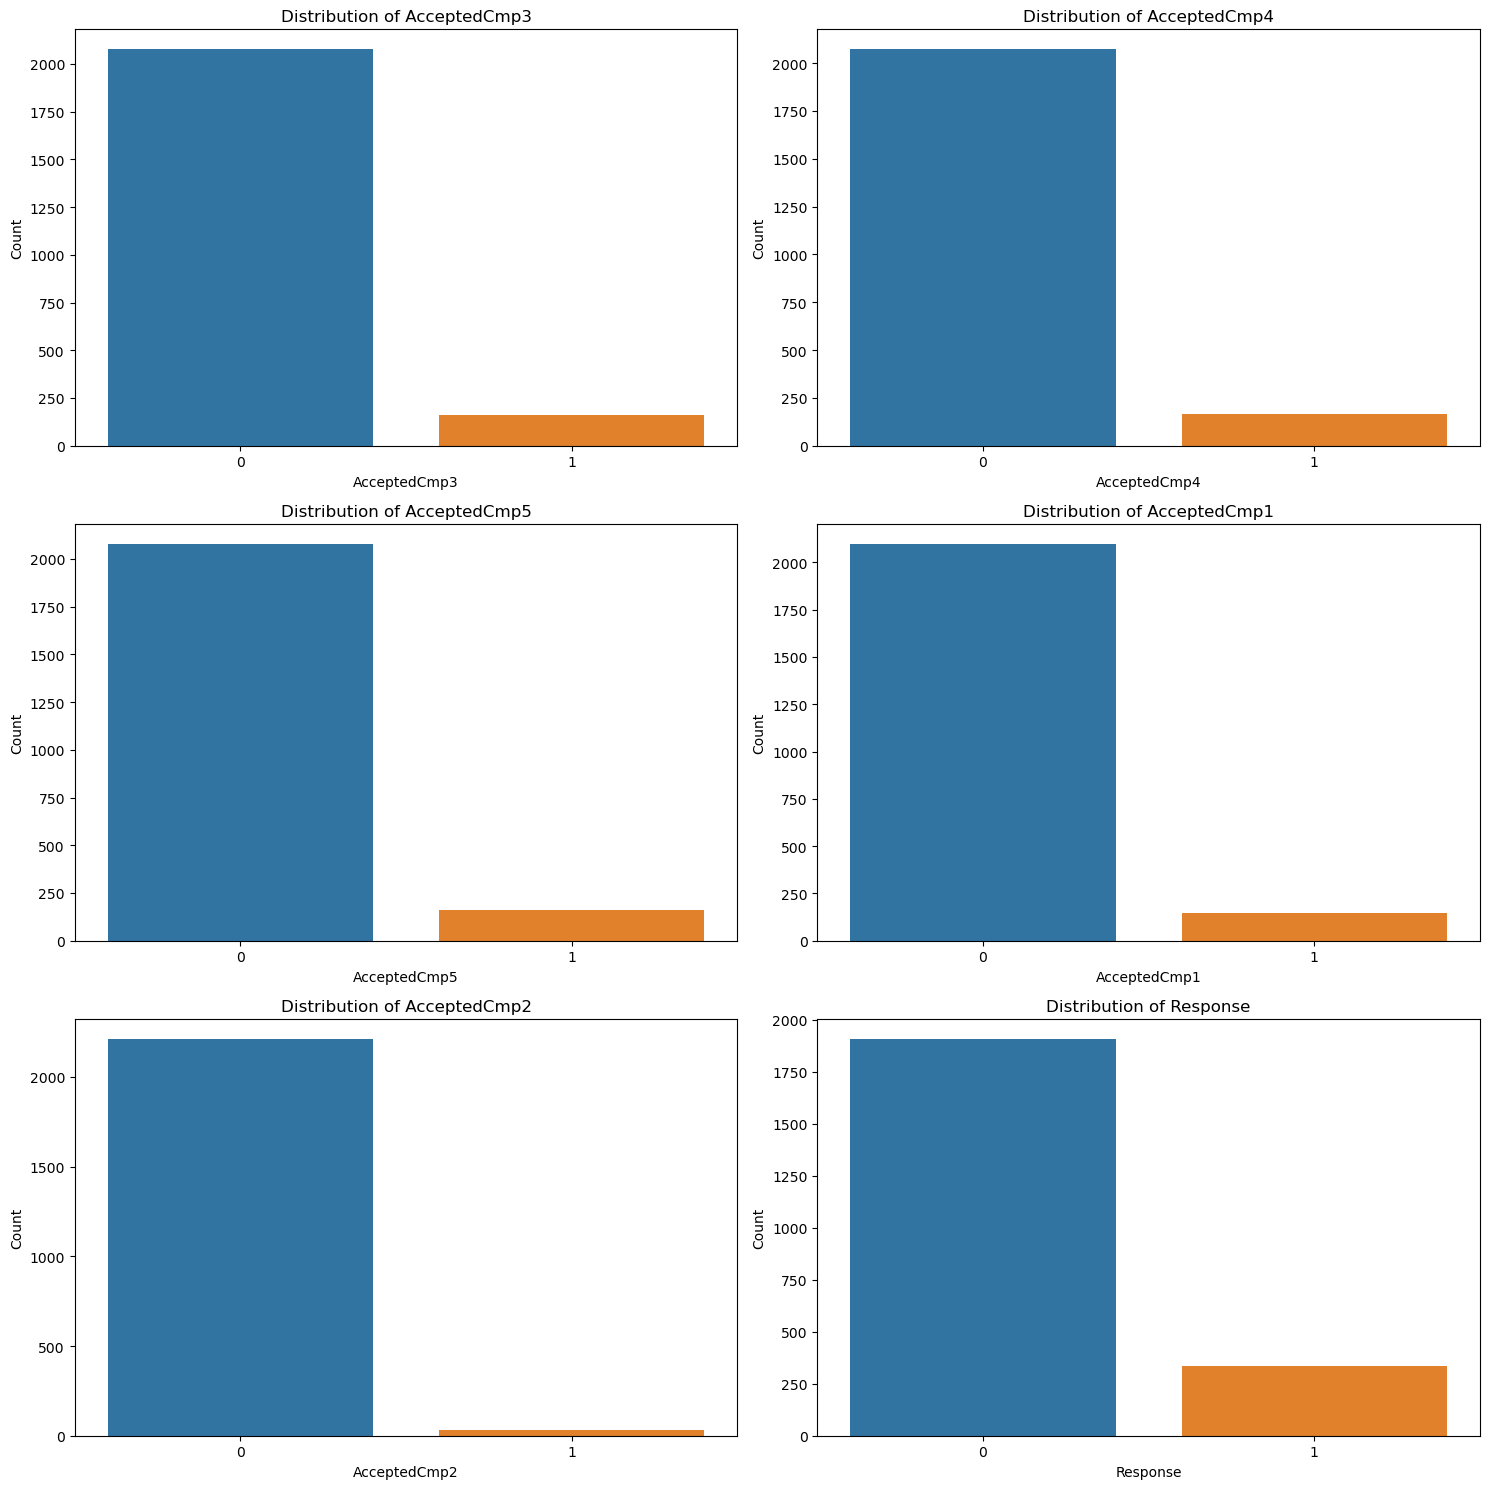

In [12]:
columns_to_plot = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response']

num_columns = len(columns_to_plot)
num_rows = (num_columns + 1) // 2

fig, axs = plt.subplots(num_rows, 2, figsize=(15, 5*num_rows))

axs = axs.flatten()

for i, column in enumerate(columns_to_plot):
    sns.countplot(x=column, data=df, order=df[column].value_counts().index, ax=axs[i])
    axs[i].set_title(f'Distribution of {column}')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

Convert the data with datatype object to number using one hot encoding

In [13]:
object_cols = ['Education', 'Marital_Status']
new_df = pd.get_dummies(df, columns=object_cols, prefix=object_cols)
new_df.columns

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Education_2n Cycle', 'Education_Basic', 'Education_Graduation',
       'Education_Master', 'Education_PhD', 'Marital_Status_Absurd',
       'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO'],
      dtype='object')

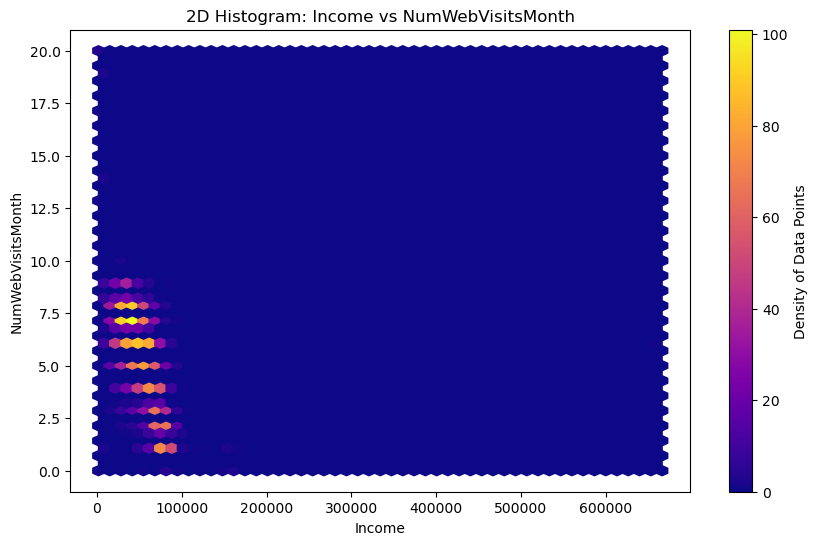

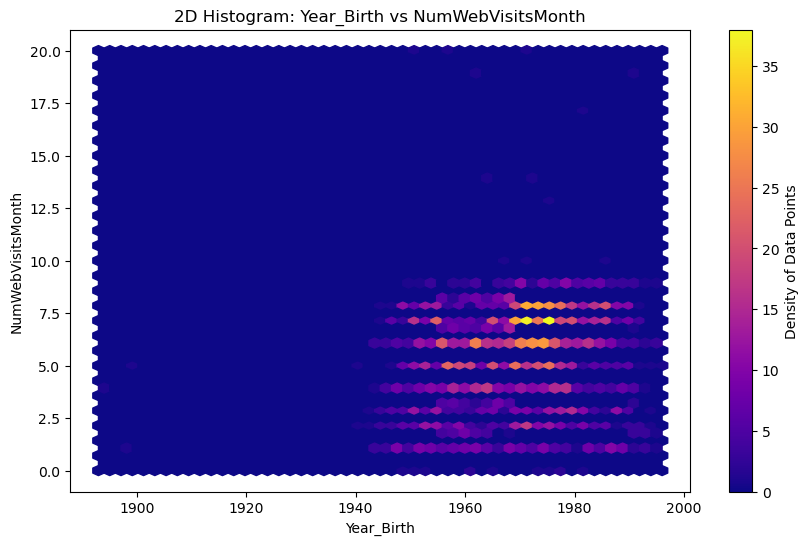

In [14]:
plt.figure(figsize=(10, 6))
hb = plt.hexbin(df['Income'], df['NumWebVisitsMonth'], gridsize=50, cmap='plasma', reduce_C_function=np.mean)
cb = plt.colorbar(hb)
cb.set_label('Density of Data Points')
plt.xlabel('Income')
plt.ylabel('NumWebVisitsMonth')
plt.title('2D Histogram: Income vs NumWebVisitsMonth')
plt.show()

plt.figure(figsize=(10, 6))
hb = plt.hexbin(df['Year_Birth'], df['NumWebVisitsMonth'], gridsize=50, cmap='plasma', reduce_C_function=np.mean)
cb = plt.colorbar(hb)
cb.set_label('Density of Data Points')
plt.xlabel('Year_Birth')
plt.ylabel('NumWebVisitsMonth')
plt.title('2D Histogram: Year_Birth vs NumWebVisitsMonth')
plt.show()

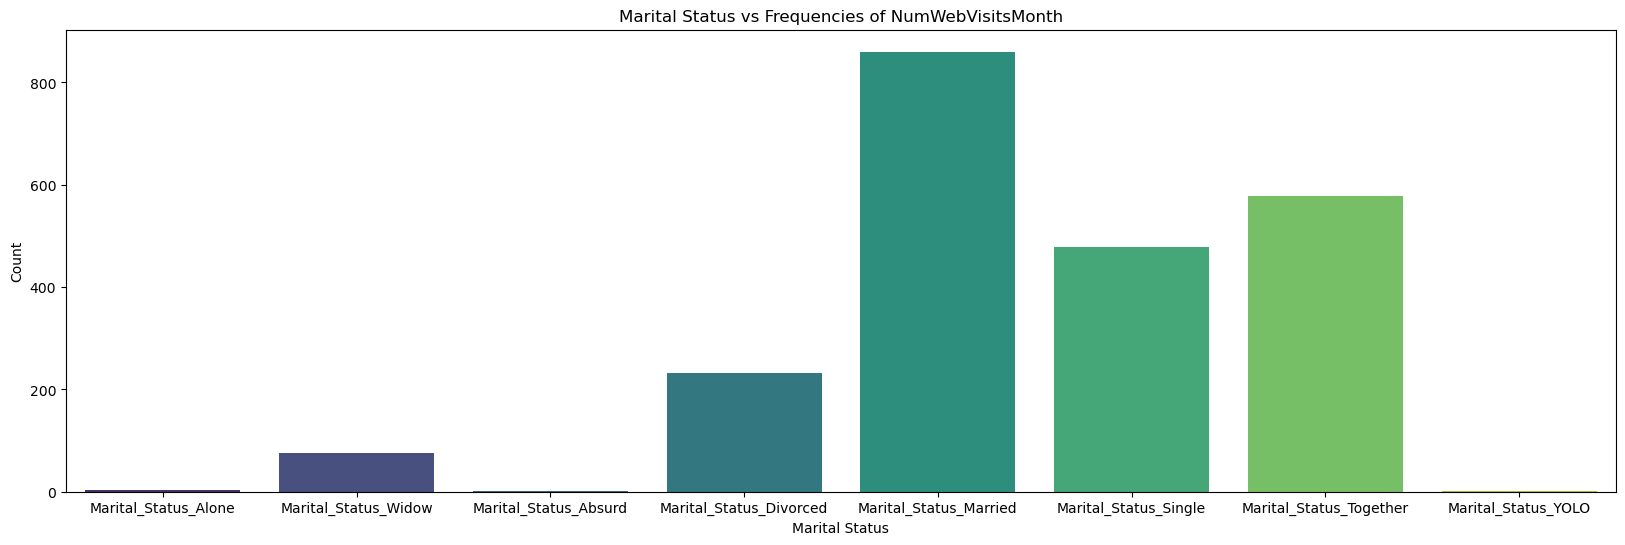

In [15]:
filtered_df = new_df[(new_df['Marital_Status_Alone'] | new_df['Marital_Status_Widow'] | new_df['Marital_Status_Absurd'] | 
                     new_df['Marital_Status_Divorced'] | new_df['Marital_Status_Married'] | new_df['Marital_Status_Single'] | 
                     new_df['Marital_Status_Together'] | new_df['Marital_Status_YOLO']) & (new_df['NumWebVisitsMonth'] > 0)]

counts = filtered_df[['Marital_Status_Alone', 'Marital_Status_Widow', 'Marital_Status_Absurd', 
                      'Marital_Status_Divorced', 'Marital_Status_Married', 'Marital_Status_Single', 
                      'Marital_Status_Together', 'Marital_Status_YOLO']].sum()
plt.figure(figsize=(20, 6))
sns.barplot(x=counts.index, y=counts.values, palette='viridis')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Marital Status vs Frequencies of NumWebVisitsMonth')
plt.show()

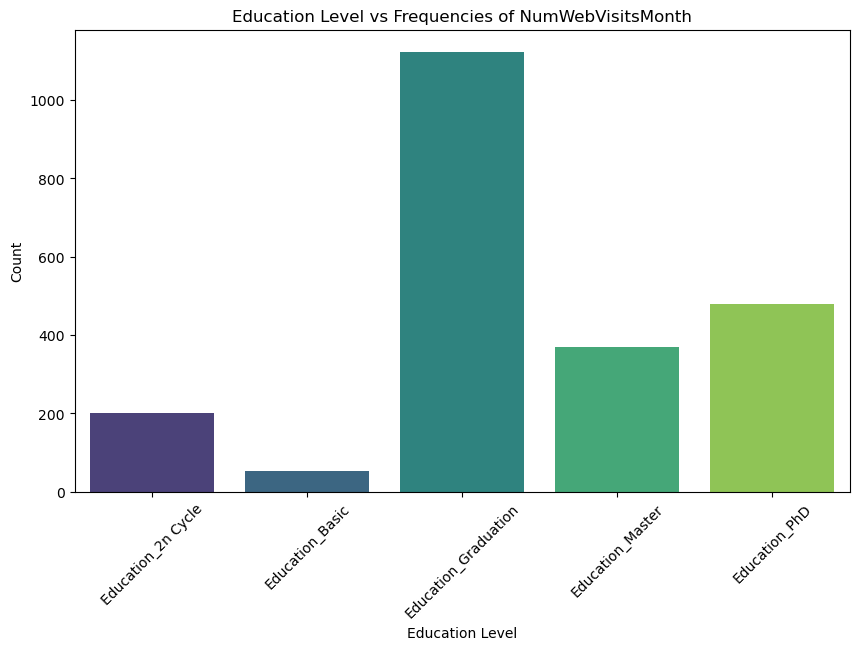

In [16]:
filtered_df = new_df[(new_df['Education_2n Cycle'] | new_df['Education_Basic'] | new_df['Education_Graduation'] | 
                      new_df['Education_Master'] | new_df['Education_PhD']) & (new_df['NumWebVisitsMonth'] > 0)]

counts = filtered_df[['Education_2n Cycle', 'Education_Basic', 'Education_Graduation', 
                      'Education_Master', 'Education_PhD']].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=counts.index, y=counts.values, palette='viridis')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Education Level vs Frequencies of NumWebVisitsMonth')
plt.xticks(rotation=45)
plt.show()

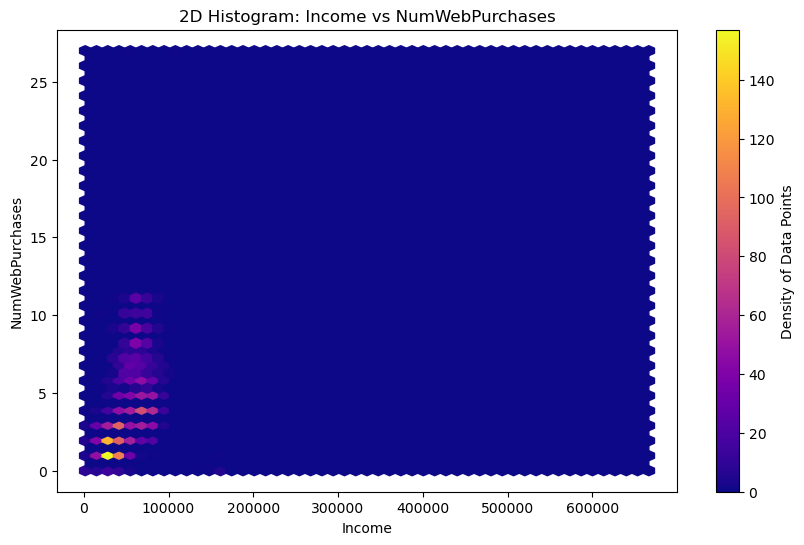

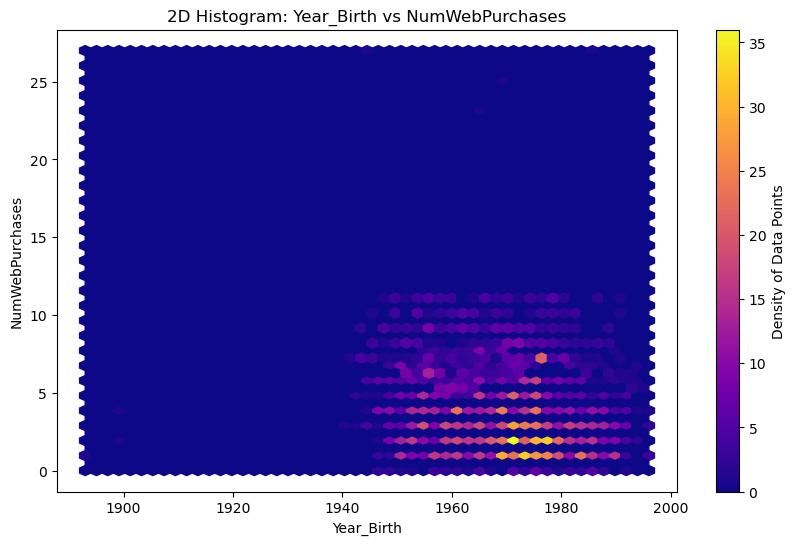

In [17]:
plt.figure(figsize=(10, 6))
hb = plt.hexbin(df['Income'], df['NumWebPurchases'], gridsize=50, cmap='plasma', reduce_C_function=np.mean)
cb = plt.colorbar(hb)
cb.set_label('Density of Data Points')
plt.xlabel('Income')
plt.ylabel('NumWebPurchases')
plt.title('2D Histogram: Income vs NumWebPurchases')
plt.show()

plt.figure(figsize=(10, 6))
hb = plt.hexbin(df['Year_Birth'], df['NumWebPurchases'], gridsize=50, cmap='plasma', reduce_C_function=np.mean)
cb = plt.colorbar(hb)
cb.set_label('Density of Data Points')
plt.xlabel('Year_Birth')
plt.ylabel('NumWebPurchases')
plt.title('2D Histogram: Year_Birth vs NumWebPurchases')
plt.show()

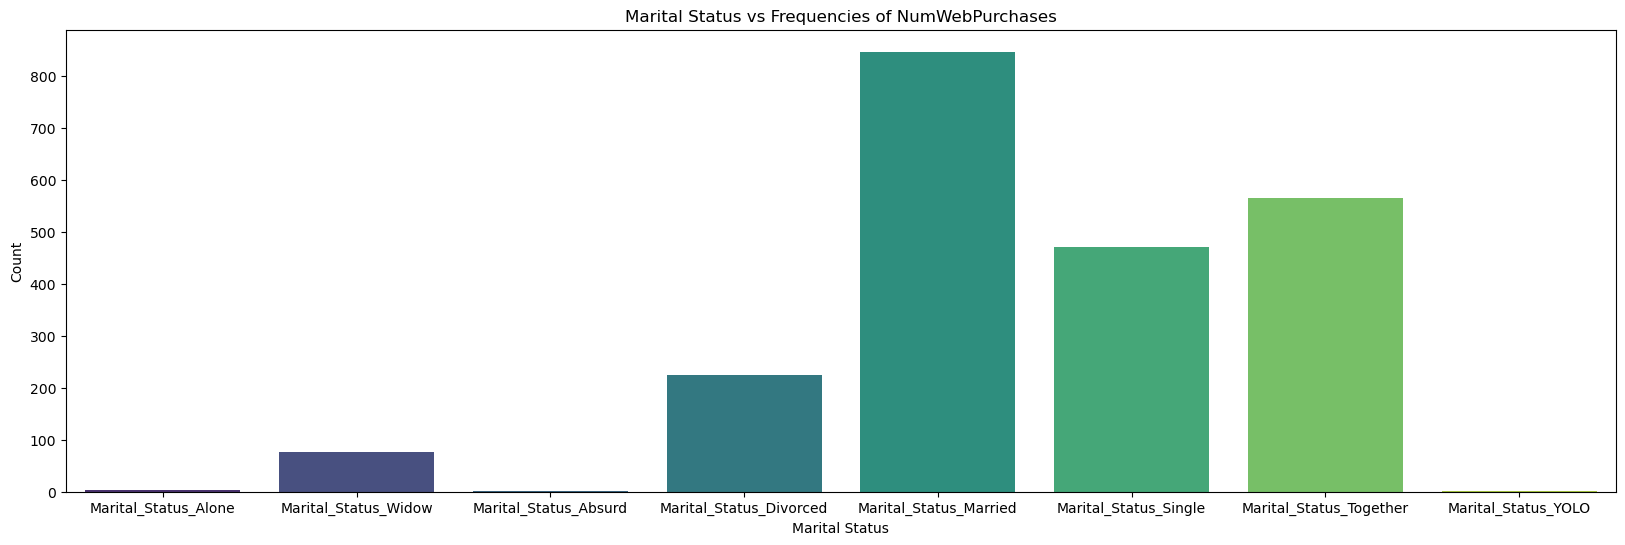

In [18]:
filtered_df = new_df[(new_df['Marital_Status_Alone'] | new_df['Marital_Status_Widow'] | new_df['Marital_Status_Absurd'] | 
                     new_df['Marital_Status_Divorced'] | new_df['Marital_Status_Married'] | new_df['Marital_Status_Single'] | 
                     new_df['Marital_Status_Together'] | new_df['Marital_Status_YOLO']) & (new_df['NumWebPurchases'] > 0)]

counts = filtered_df[['Marital_Status_Alone', 'Marital_Status_Widow', 'Marital_Status_Absurd', 
                      'Marital_Status_Divorced', 'Marital_Status_Married', 'Marital_Status_Single', 
                      'Marital_Status_Together', 'Marital_Status_YOLO']].sum()
plt.figure(figsize=(20, 6))
sns.barplot(x=counts.index, y=counts.values, palette='viridis')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Marital Status vs Frequencies of NumWebPurchases')
plt.show()

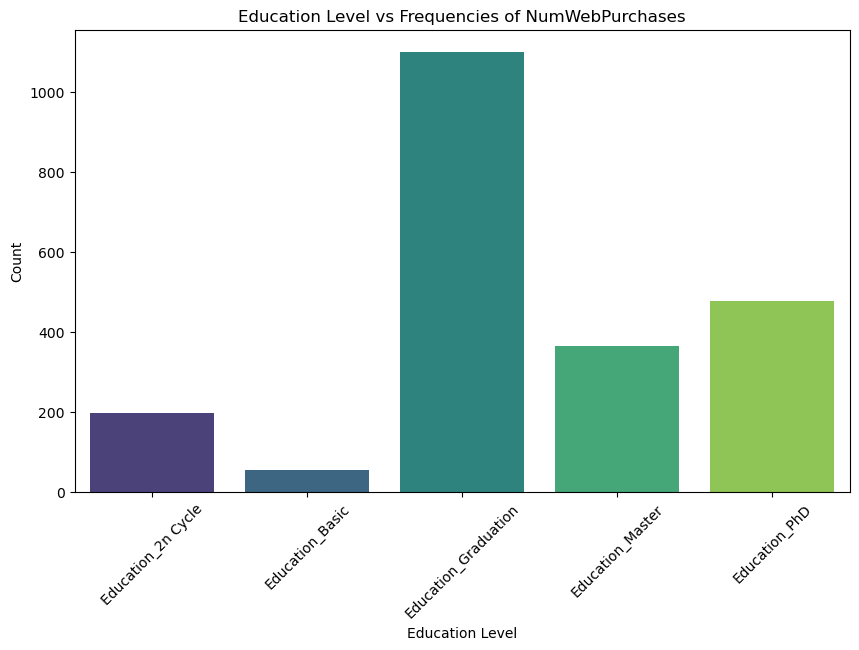

In [19]:
filtered_df = new_df[(new_df['Education_2n Cycle'] | new_df['Education_Basic'] | new_df['Education_Graduation'] | 
                      new_df['Education_Master'] | new_df['Education_PhD']) & (new_df['NumWebPurchases'] > 0)]

counts = filtered_df[['Education_2n Cycle', 'Education_Basic', 'Education_Graduation', 
                      'Education_Master', 'Education_PhD']].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=counts.index, y=counts.values, palette='viridis')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Education Level vs Frequencies of NumWebPurchases')
plt.xticks(rotation=45)
plt.show()

The conclusion that i get from these visualization is that the web purchaser and web viewer are mostly having income from 0-100000, the birth year is between 1960-1980, married, and graduated

<Axes: >

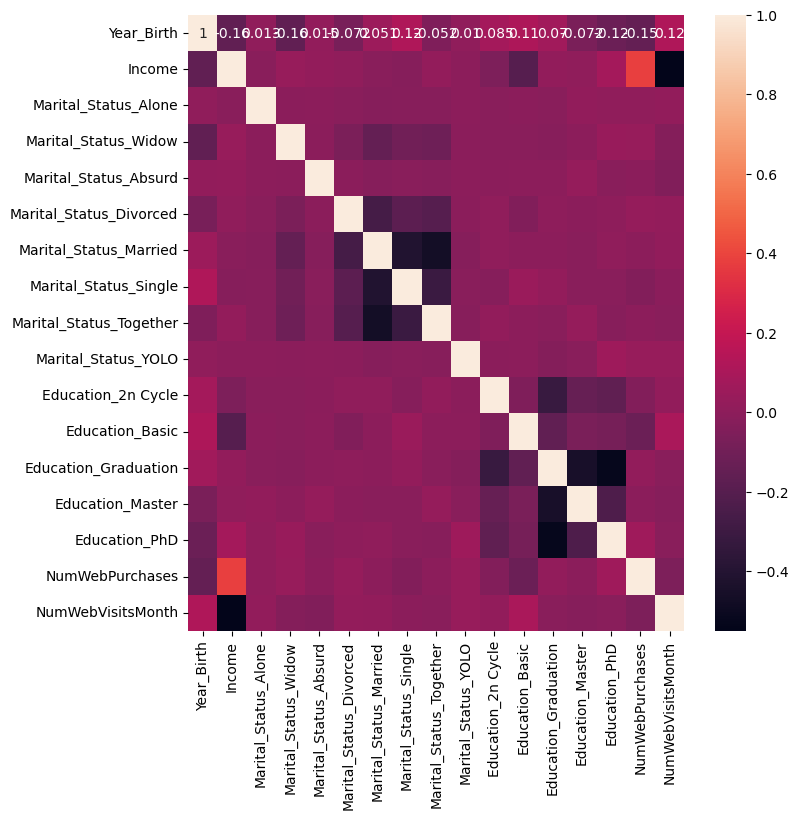

In [20]:
fix_df = new_df[['Year_Birth', 'Income', 'Marital_Status_Alone', 'Marital_Status_Widow', 'Marital_Status_Absurd', 
                  'Marital_Status_Divorced', 'Marital_Status_Married', 'Marital_Status_Single', 
                  'Marital_Status_Together', 'Marital_Status_YOLO', 'Education_2n Cycle', 'Education_Basic', 
                  'Education_Graduation', 'Education_Master', 'Education_PhD', 'NumWebPurchases', 'NumWebVisitsMonth']]
corr = fix_df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True)


# Clustering

In [21]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(fix_df)

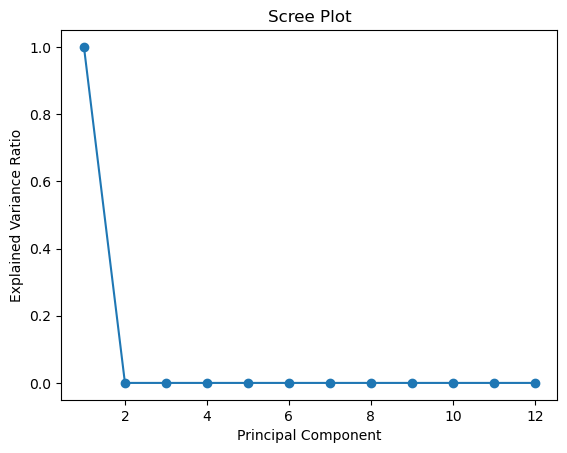

In [22]:
pca = PCA(n_components=len(fix_df.columns))
pca.fit(fix_df)
explained_variance_ratio = pca.explained_variance_ratio_
plt.plot(range(1, 13), explained_variance_ratio[:12], marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

In [23]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

In [24]:
data_pca

array([[ 0.27822497,  1.43602222],
       [-0.47450455,  1.25566495],
       [ 1.37998106,  1.4105373 ],
       ...,
       [-0.51595657,  1.15164768],
       [ 1.82456897, -1.03499357],
       [ 0.37951601, -1.67773181]])

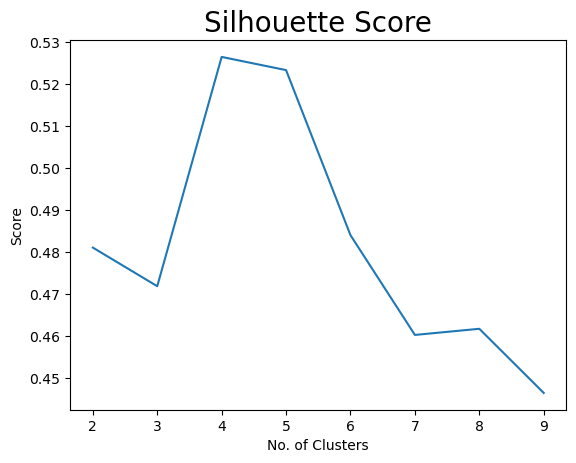

In [25]:
scores = []
for i in range(2, 10):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(data_pca)
    labels = km.labels_
    silhouette_avg = silhouette_score(data_pca, labels)
    scores.append(silhouette_avg)

plt.plot(range(2, 10), scores)
plt.title('Silhouette Score', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('Score')
plt.show()

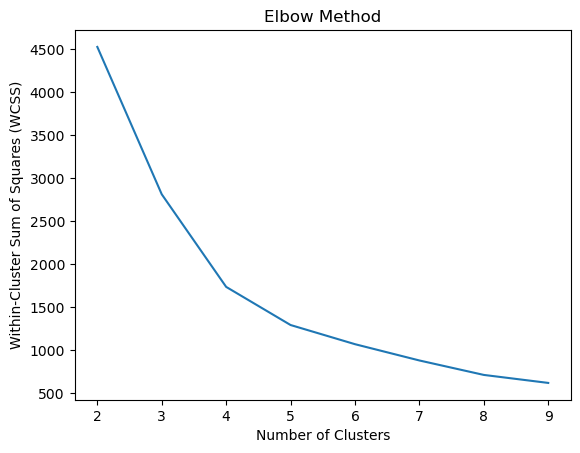

In [26]:
wcss = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_pca)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 10), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method')
plt.show()

The average silhouette score is: 0.5263434998447636


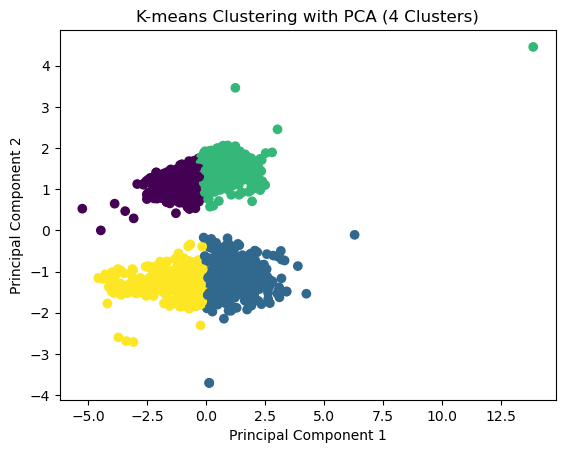

In [27]:
k = 4 # Number of clusters you want to create
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data_pca)

silhouette_avg = silhouette_score(data_pca, kmeans.labels_)
print("The average silhouette score is:", silhouette_avg)

plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering with PCA (4 Clusters)')
plt.show()

# Analisis

In [36]:
df_kmeans_pca=pd.concat([fix_df.reset_index(drop=True), pd.DataFrame(data_pca)],axis=1)
df_kmeans_pca.columns.values[-2: ] = ['Component 1', 'Component 2']
df_kmeans_pca['df kmeans pca']=kmeans.labels_

In [37]:
df_kmeans_pca.head()

,Year_Birth,Income,Marital_Status_Alone,Marital_Status_Widow,Marital_Status_Absurd,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_YOLO,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,NumWebPurchases,NumWebVisitsMonth,Component 1,Component 2,df kmeans pca
0,1957,58138.0,False,False,False,False,False,True,False,False,False,False,True,False,False,8,7,0.278225,1.436022,2
1,1954,46344.0,False,False,False,False,False,True,False,False,False,False,True,False,False,1,5,-0.474505,1.255665,0
2,1965,71613.0,False,False,False,False,False,False,True,False,False,False,True,False,False,8,4,1.379981,1.410537,2
3,1984,26646.0,False,False,False,False,False,False,True,False,False,False,True,False,False,2,6,-1.409365,1.012368,0
4,1981,58293.0,False,False,False,False,True,False,False,False,False,False,False,False,True,5,5,0.380671,-1.311991,1


In [42]:
df_kmeans_pca['segment']=df_kmeans_pca['df kmeans pca'].map({0: 'first', 1: 'second', 2: 'third', 3: 'fourth'})

In [45]:
# Get the PCA components (loadings)
pca_components = pca.components_

# Create a DataFrame for better visualization and analysis
pca_loadings_df = pd.DataFrame(pca_components, columns=fix_df.columns, index=[f'PC{i+1}' for i in range(pca.n_components_)])

# Display the loadings
pca_loadings_df

,Year_Birth,Income,Marital_Status_Alone,Marital_Status_Widow,Marital_Status_Absurd,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_YOLO,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,NumWebPurchases,NumWebVisitsMonth
PC1,-0.348294,0.582169,-0.001788,0.137988,0.024618,0.068514,-0.061405,-0.116287,0.070446,0.002001,-0.103023,-0.276020,-0.073966,0.065298,0.205363,0.380474,-0.457926
PC2,0.094129,0.139175,-0.028140,-0.053935,0.038091,-0.012527,-0.024675,0.097294,-0.028199,-0.067775,-0.181728,-0.125659,0.755087,-0.316071,-0.457866,0.075995,-0.129261


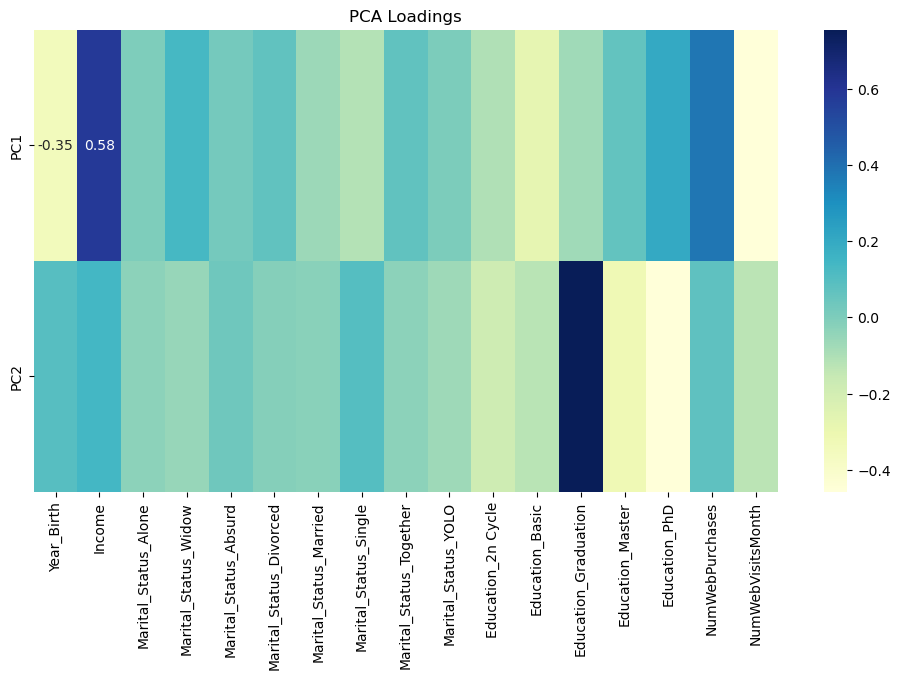

In [46]:
plt.figure(figsize=(12, 6))
sns.heatmap(pca_loadings_df, cmap="YlGnBu", annot=True)
plt.title('PCA Loadings')
plt.show()

Dari hasil PCA dapat diketahui sebagai berikut:

PC1:
- Income memiliki kontribusi signifikan karena memiliki loading yang tinggi positif
- Year_Birth memiliki kontribusi signifikan karena memiliki loading yang rendah negatif
- Education_Graduation, Education_Master, Education_PhD memiliki loadings yang cukup tinggi pada PC1
- NumWebPurchases, NumWebVisitsMonth memiliki loadings yang cukup tinggi positif pada PC1

PC2:
- Education_PhD memiliki loading yang sangat tinggi positif pada PC2
- Education_Basic, Education_Master memiliki loadings yang cukup tinggi negatif pada PC2



Analisis:
PC1 -> terkait dengan sosio-ekonomi umum, seperti background user serta aktivitas pembelian
PC2 -> terkait dengan pendidikan

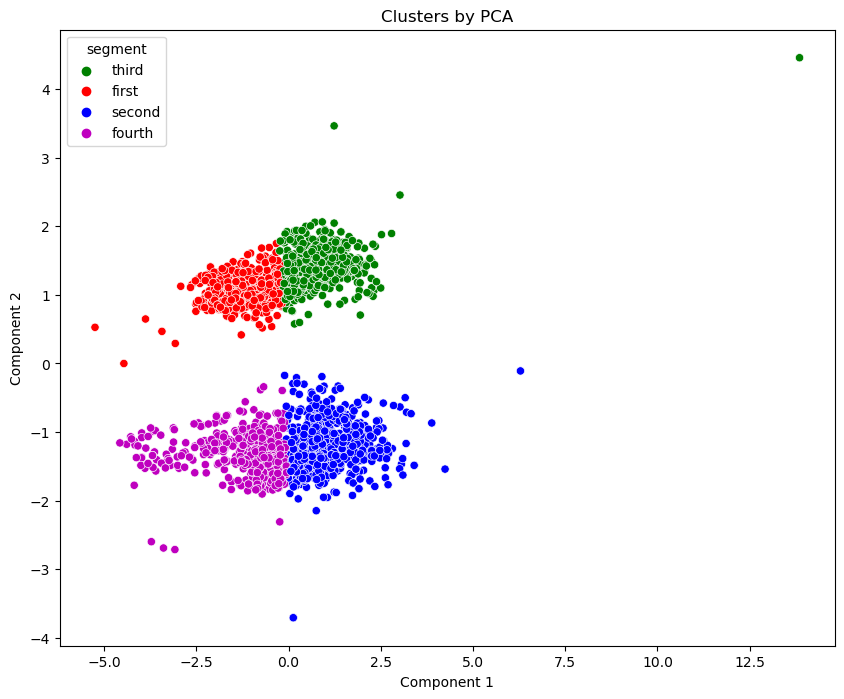

In [43]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Component 1', y='Component 2', hue='segment', palette=['g', 'r', 'b', 'm'], data=df_kmeans_pca)
plt.title('Clusters by PCA')
plt.show()

In [51]:
# Inverse transform the cluster centers
original_space_centroids = scaler.inverse_transform(pca.inverse_transform(kmeans.cluster_centers_))

# Create a DataFrame for the inverse transformed cluster centers
centroids_df = pd.DataFrame(original_space_centroids, columns=fix_df.columns)

# Display the centroids
centroids_df

,Year_Birth,Income,Marital_Status_Alone,Marital_Status_Widow,Marital_Status_Absurd,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_YOLO,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,NumWebPurchases,NumWebVisitsMonth
0,1974.996657,38377.699297,0.000343,-0.006087,0.001197,0.074506,0.409082,0.313293,0.208959,-0.001293,0.071683,0.054843,0.941754,0.013498,-0.081778,3.035445,6.323743
1,1962.692976,64821.994564,0.002481,0.074785,0.000390,0.131995,0.365673,0.112448,0.308874,0.003354,0.118406,-0.001607,0.014564,0.331670,0.536967,5.046009,4.414616
2,1966.825065,69526.752876,-0.000153,0.042075,0.003108,0.116029,0.343481,0.229370,0.267974,-0.001882,-0.007407,-0.038870,0.998701,0.021974,0.025602,5.280090,3.932186
3,1972.559828,29265.619636,0.002790,0.015792,-0.001546,0.082364,0.439321,0.221264,0.236505,0.003510,0.197249,0.103045,0.047552,0.290756,0.361398,2.473225,7.132381


Analisis sementara:

1. Klaster 0:
- Rata-rata pendapatan sekitar 38.000
- Tahun kelahiran rata-rata sekitar 1975.
- Mereka umumnya memiliki status perkawinan "Menikah" dan "Single"
- Dalam hal pendidikan, proporsi yang lebih tinggi telah menyelesaikan graduation.
- Mereka memiliki tingkat aktivitas web yang sedang, dengan jumlah rata-rata pembelian web sekitar 3 dan jumlah kunjungan web per bulan yang lebih tinggi (sekitar 6).


2. Klaster 1:
- Rata-rata pendapatan sekitar 65.000.
- Tahun kelahiran rata-rata sekitar 1963.
- Sebagian besar pengguna dalam klaster ini memiliki status perkawinan "Menikah"
- Mereka memiliki tingkat pendidikan yang lebih tinggi, yaitu telah menyelesaikan pendidikan master dan phd.
- Tingkat aktivitas web mereka sedang, dengan jumlah rata-rata pembelian web yang lebih tinggi (sekitar 5) tetapi jumlah kunjungan web per bulan yang sedikit lebih rendah (sekitar 4).

3. Klaster 2:
- Rata-rata pendapatan sekitar 70.000.
- Tahun kelahiran rata-rata sekitar 1967.
- Sebagian besar pengguna dalam klaster ini memiliki status perkawinan "Menikah"
- Secara pendidikan, mereka memiliki proporsi pengguna yang tinggi yang telah menyelesaikan graduation.
- Tingkat aktivitas web mereka mirip dengan Klaster 1, dengan jumlah rata-rata pembelian web yang lebih tinggi (sekitar 5) dan jumlah kunjungan web per bulan yang sedikit lebih rendah (sekitar 4).

4. Klaster 3:
- Rata-rata pendapatan sekitar 29.000.
- Tahun kelahiran rata-rata sekitar 1973.
- Sebagian besar pengguna dalam klaster ini memiliki status perkawinan "Menikah" atau "Single"
- Secara pendidikan, mereka memiliki latar belakang pendidikan yang beragam
- Tingkat aktivitas web mereka relatif tinggi dibandingkan dengan klaster lainnya, dengan jumlah rata-rata pembelian web yang lebih rendah (sekitar 2,5) tetapi jumlah kunjungan web per bulan yang lebih tinggi (sekitar 7).